# Quantum Walk Project (m24ph1015-Raman Rathour)
## Classical vs Quantum Walk — 32 Positions — 20 Steps  

A *random walk* describes the motion of a particle that moves left or right at every step.  
There are two main types:

---

## 1. Classical Random Walk  
A classical walker moves left or right with equal probability.  
After *N steps, the probability distribution is **binomial*, which looks like a smooth bell curve.

The classical probability is:
\[
P(x) = \frac{1}{2^N} \binom{N}{\frac{x+N}{2}}
\]

---

## 2. Quantum Walk  
A quantum walker has:

- A *coin qubit* (|0> = move left, |1> = move right)  
- *Position qubits* representing a lattice of positions  

The coin is placed in superposition using the *Hadamard gate*:
\[
H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}
\]

Shifting left or right is done using a *controlled shift operator*.

Quantum walks spread *faster* than classical walks because of:
- *Interference*
- *Coin + position entanglement*

We use a *32-position periodic lattice, requiring **5 qubits* for position.

---

The topic covered in this project

1. Classical walk — analytical solution  
2. Quantum walk — full NumPy statevector simulation  

4. Final comparison plot

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import math
from qiskit import QuantumCircuit

Parameters


In [118]:
steps = 20
pos_qubits = 5                # 2^5 = 32 positions
N = 2 ** pos_qubits           # number of lattice sites (32)
center_index = N // 2         # start at center


Define Coin (Hadamard) and Identity on Position Space

In [119]:
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1, -1]], dtype=complex)

Ipos = np.eye(N, dtype=complex)


Build Shift Operator S

In [120]:
dim = 2 * N
S = np.zeros((dim, dim), dtype=complex)

for pos in range(N):
    src0 = 0 * N + pos
    src1 = 1 * N + pos

    tgt0_pos = (pos - 1) % N
    tgt1_pos = (pos + 1) % N

    tgt0 = 0 * N + tgt0_pos
    tgt1 = 1 * N + tgt1_pos

    S[tgt0, src0] = 1.0
    S[tgt1, src1] = 1.0


Build One-step Unitary

In [121]:
U_step = S @ np.kron(H, Ipos)


Initial State: Coin in |+> and Walker in Center

In [122]:
coin_plus = np.array([1/np.sqrt(2), 1/np.sqrt(2)], dtype=complex)

pos0 = np.zeros(N, dtype=complex)
pos0[center_index] = 1.0

psi0 = np.kron(coin_plus, pos0)


In [123]:
coin_plus = np.array([1/np.sqrt(2), 1/np.sqrt(2)], dtype=complex)

pos0 = np.zeros(N, dtype=complex)
pos0[center_index] = 1.0

psi0 = np.kron(coin_plus, pos0)


Time Evolution

In [124]:
psi = psi0.copy()
for _ in range(steps):
    psi = U_step @ psi


Compute Position Probabilities

In [125]:

psi_r = psi.reshape(2, N)          
prob_q = np.abs(psi_r)**2          
pos_prob_q = prob_q.sum(axis=0)    
positions_q = np.arange(N) - center_index


Classical Random Walk Distribution

In [126]:
positions_c = np.arange(-steps, steps+1, 2)

prob_c = np.array([
    math.comb(steps, (x + steps)//2) / (2**steps) 
    if 0 <= (x + steps)//2 <= steps else 0
    for x in positions_c
])


Plot Quantum vs Classical

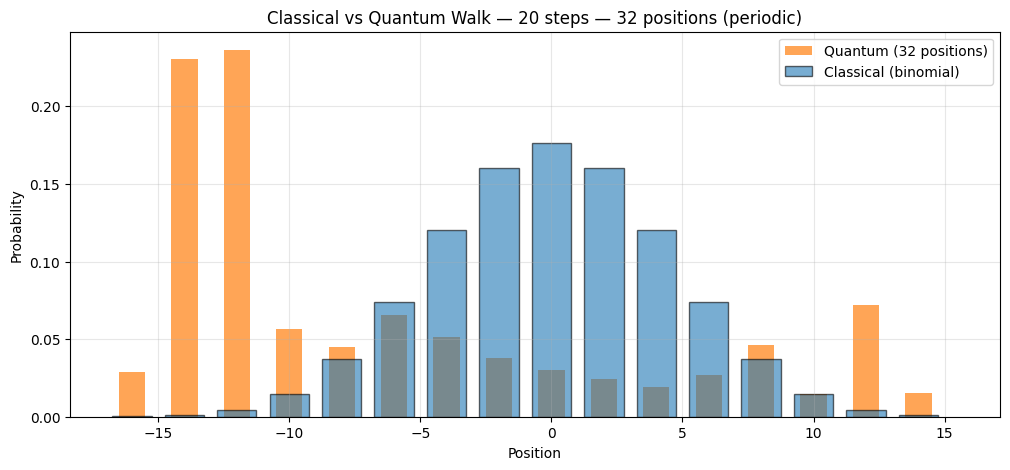

In [127]:
plt.figure(figsize=(12,5))
plt.bar(positions_q, pos_prob_q, width=1.0, alpha=0.7,
        label='Quantum (32 positions)', color='tab:orange')

mask = (positions_c >= positions_q.min()) & (positions_c <= positions_q.max())

plt.bar(positions_c[mask], prob_c[mask], width=1.5, alpha=0.6,
        label='Classical (binomial)', color='tab:blue', edgecolor='black')

plt.title(f'Classical vs Quantum Walk — {steps} steps — {N} positions (periodic)')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Observations & resuts
The quantum walk spreads quadratically faster than the classical random walk.

Classical walks follow a binomial distribution, producing a Gaussian-like peak around the center.

Quantum interference creates two dominant peaks at the edges, showing ballistic spreading.

The Hadamard coin causes constructive and destructive interference, leading to oscillatory probability patterns.

The simulation demonstrates that even with pure NumPy (no Qiskit/Aer), full statevector quantum walk dynamics can be modeled efficiently.

This faster spreading is what makes quantum walks useful for search algorithms, quantum transport, and quantum simulation.